In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, KFold
from sklearn.ensemble import AdaBoostClassifier

In [2]:
os.getcwd()

'C:\\Users\\Sagar'

In [3]:
os.chdir ('C:\\Users\\Sagar\\Downloads')
os.getcwd()

'C:\\Users\\Sagar\\Downloads'

In [4]:
df=pd.read_csv('parkinsons.data')
display (df)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [5]:
display (df.shape)

(195, 24)

In [6]:
len(df)

195

In [7]:
display (df.dtypes )

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [9]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [10]:
display (df.isna().sum() )

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [11]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [12]:
df['status']

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

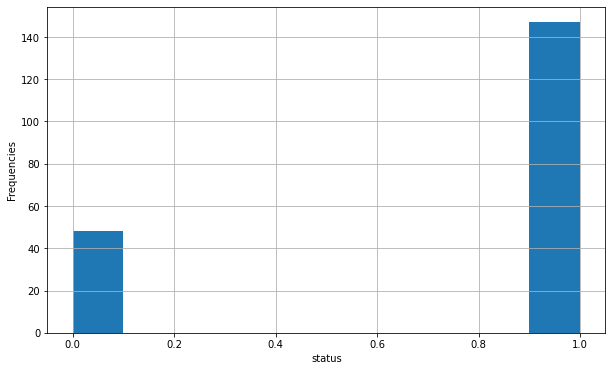

In [13]:
plt.figure(figsize=(10, 6))
df.status.hist()
plt.xlabel('status')
plt.ylabel('Frequencies')
plt.plot()
plt.show()


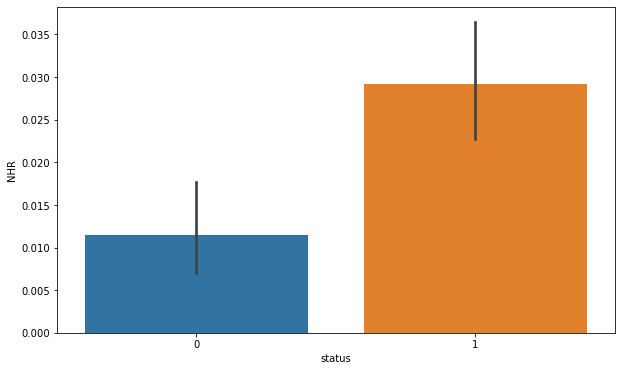

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x="status",y="NHR",data=df);

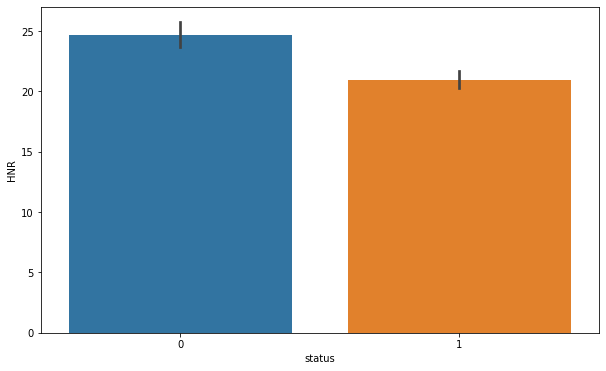

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x="status",y="HNR",data=df);


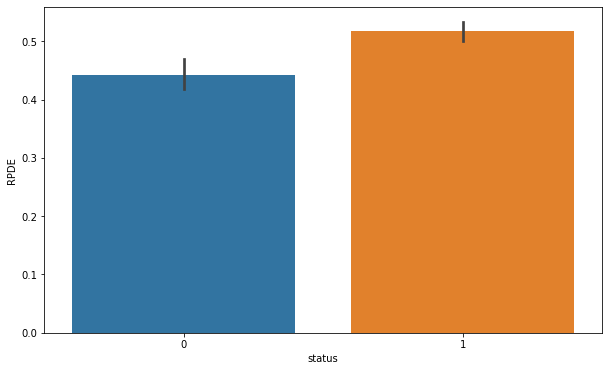

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x="status",y="RPDE",data=df);


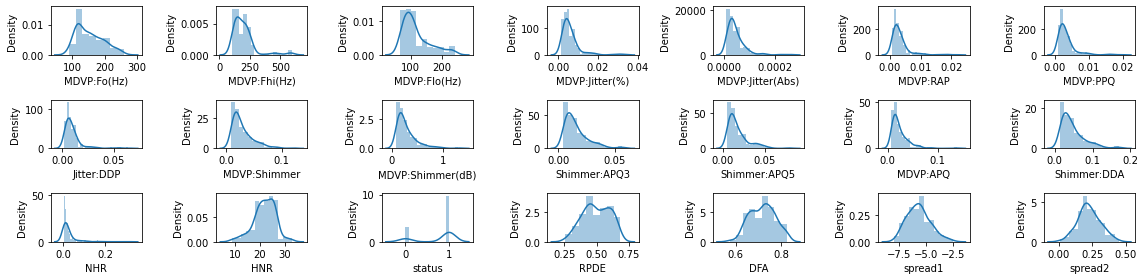

In [17]:
import warnings
warnings.filterwarnings('ignore')
rows=3
cols=7
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(16,4))
col=df.columns
index=1
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]],ax=ax[i][j])
        index=index+1
        
plt.tight_layout()

In [18]:
df.shape

(195, 24)

In [19]:
corr = df.corr()
display (corr)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


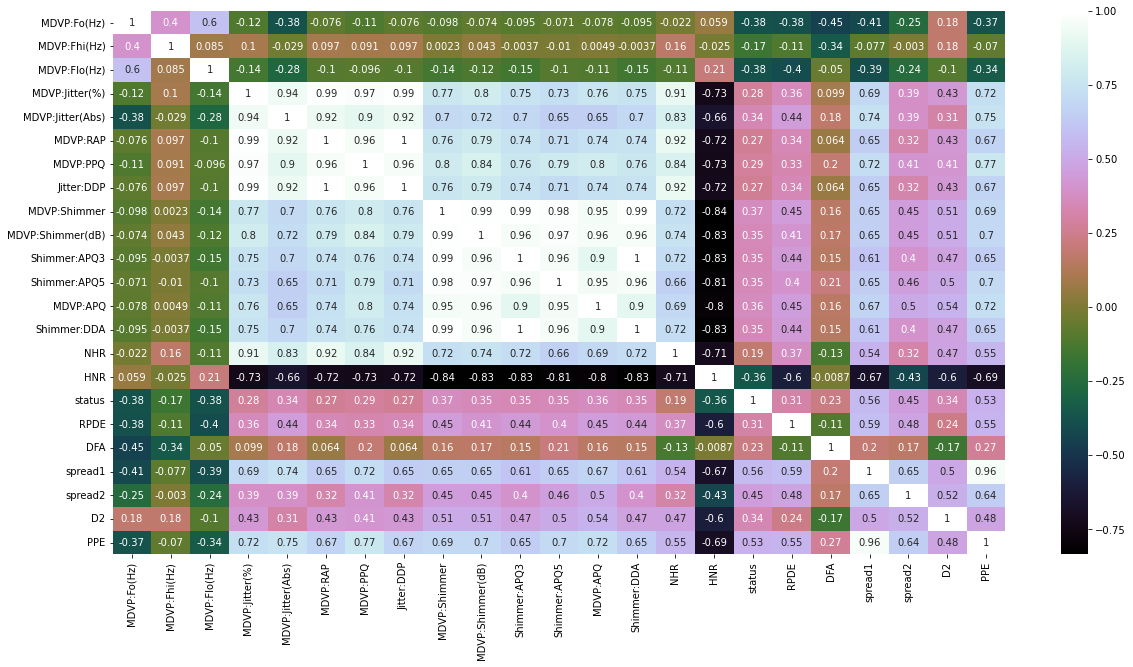

In [20]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='cubehelix',annot = True)
plt.show()

<AxesSubplot:>

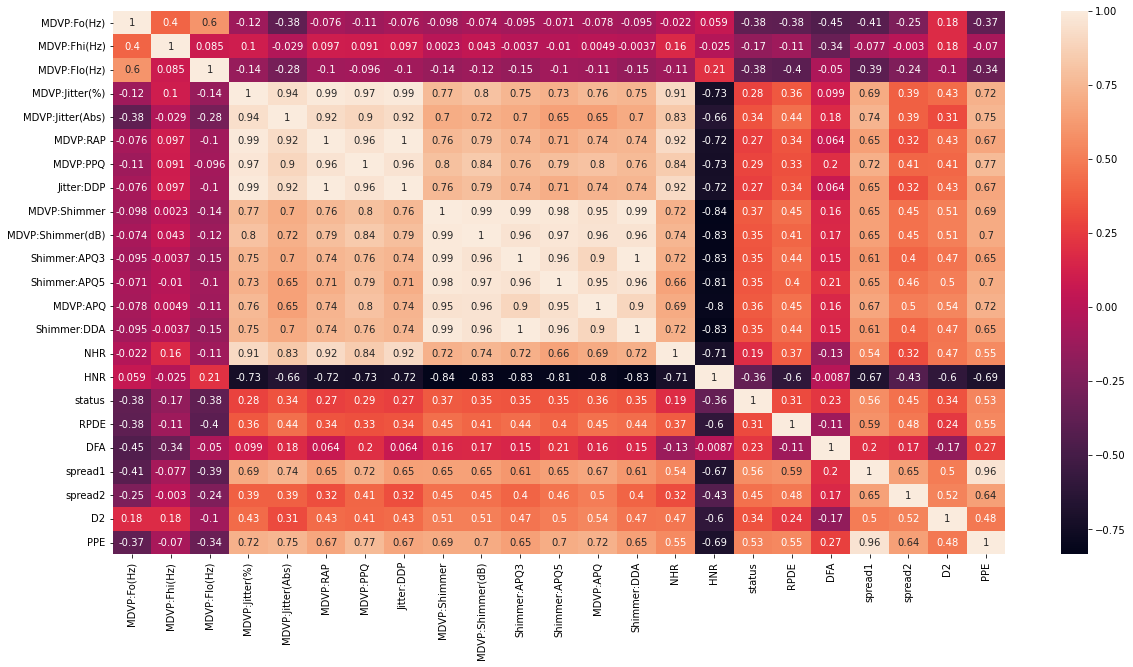

In [21]:
rcParams['figure.figsize'] = 20,10
sns.heatmap(corr,annot = True)

In [22]:
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [23]:
df.drop(['name'],axis=1,inplace=True)

In [24]:
X=df.drop(labels=['status'],axis=1)
Y=df['status']
X.head()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [25]:
display (X.head())

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [26]:
display (Y.head())

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [27]:
X

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(156, 22) (39, 22) (156,) (39,)


In [29]:
log_reg = LogisticRegression().fit(X_train, Y_train)
#predict on train 
train_preds = log_reg.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds))


Model accuracy on train is:  0.8717948717948718


In [30]:
log_reg = LogisticRegression().fit(X_train, Y_train)
#predict on train 
train_preds = log_reg.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds))

#predict on test
test_preds = log_reg.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is:\n ", confusion_matrix(Y_train, train_preds))
print("confusion_matrix test is:\n ", confusion_matrix(Y_test, test_preds))
print('\nClassification Report Train is ')
print(classification_report (Y_train, train_preds))
print('\nClassification Report Test is ')
print(classification_report (Y_test, test_preds))

Model accuracy on train is:  0.8717948717948718
Model accuracy on test is:  0.8461538461538461
--------------------------------------------------
confusion_matrix train is:
  [[ 24  16]
 [  4 112]]
confusion_matrix test is:
  [[ 5  3]
 [ 3 28]]

Classification Report Train is 
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        40
           1       0.88      0.97      0.92       116

    accuracy                           0.87       156
   macro avg       0.87      0.78      0.81       156
weighted avg       0.87      0.87      0.86       156


Classification Report Test is 
              precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.90      0.90      0.90        31

    accuracy                           0.85        39
   macro avg       0.76      0.76      0.76        39
weighted avg       0.85      0.85      0.85        39



In [31]:
RF=RandomForestClassifier().fit(X_train,Y_train)
#predict on train 
train_preds2 = RF.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds2))

#predict on test
test_preds2 = RF.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds2))

#Confusion matrix
print("confusion_matrix train is:\n ", confusion_matrix(Y_train, train_preds2))
print("confusion_matrix test is:\n ", confusion_matrix(Y_test, test_preds2))
print('\nClassification Report Train is ')
print(classification_report (Y_train, train_preds2))
print('\nClassification Report Test is ')
print(classification_report (Y_test, test_preds2))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.8974358974358975
confusion_matrix train is:
  [[ 40   0]
 [  0 116]]
confusion_matrix test is:
  [[ 6  2]
 [ 2 29]]

Classification Report Train is 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00       116

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156


Classification Report Test is 
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.94      0.94      0.94        31

    accuracy                           0.90        39
   macro avg       0.84      0.84      0.84        39
weighted avg       0.90      0.90      0.90        39



In [32]:
print((Y_test !=test_preds2).sum(),'/',((Y_test == test_preds2).sum()+(Y_test != test_preds2).sum()))

4 / 39


In [33]:
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds2))

KappaScore is:  0.685483870967742


In [34]:
ddf=pd.DataFrame(data=[test_preds2,Y_test])
display (ddf)

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,1,1,1,0,1,1,1,1,1,1,...,1,0,0,0,1,1,1,1,0,1
1,1,1,1,0,1,0,1,1,1,0,...,1,0,0,0,1,1,1,1,1,1


In [35]:
display (ddf.T)

,0,1
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
5,1,0
6,1,1
7,1,1
8,1,1
9,1,0


In [36]:
from sklearn.tree import DecisionTreeClassifier
#fit the model on train data 
DT = DecisionTreeClassifier().fit(X,Y)

#predict on train 
train_preds3 = DT.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds3))

#predict on test
test_preds3 = DT.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds3))
print('-'*50)
#Confusion matrix
print("confusion_matrix train is:\n ", confusion_matrix(Y_train, train_preds3))
print("confusion_matrix test is: \n", confusion_matrix(Y_test, test_preds3))
print('Wrong predictions out of total')
print('-'*50)
print('\nClassification Report Train is ')
print(classification_report (Y_train, train_preds3))
print('\nClassification Report Test is ')
print(classification_report (Y_test, test_preds3))

Model accuracy on train is:  1.0
Model accuracy on test is:  1.0
--------------------------------------------------
confusion_matrix train is:
  [[ 40   0]
 [  0 116]]
confusion_matrix test is: 
 [[ 8  0]
 [ 0 31]]
Wrong predictions out of total
--------------------------------------------------

Classification Report Train is 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00       116

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156


Classification Report Test is 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        31

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      

In [37]:
print((Y_test !=test_preds3).sum(),'/',((Y_test == test_preds3).sum()+(Y_test != test_preds3).sum()))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds3))

0 / 39
--------------------------------------------------
KappaScore is:  1.0


In [38]:
from sklearn.naive_bayes import GaussianNB
#fit the model on train data 
NB=GaussianNB()
NB.fit(X_train,Y_train)
#predict on train 
train_preds4 = NB.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds4))

#predict on test
test_preds4 = NB.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds4))
print('-'*50)
#Confusion matrix
print("confusion_matrix train is: \n", confusion_matrix(Y_train, train_preds4))
print("confusion_matrix test is:\n ", confusion_matrix(Y_test, test_preds4))
print('Wrong predictions out of total')
print('-'*50)
print('\nClassification Report Train is ')
print(classification_report (Y_train, train_preds4))
print('\nClassification Report Test is ')
print(classification_report (Y_test, test_preds4))

Model accuracy on train is:  0.7307692307692307
Model accuracy on test is:  0.6923076923076923
--------------------------------------------------
confusion_matrix train is: 
 [[38  2]
 [40 76]]
confusion_matrix test is:
  [[ 8  0]
 [12 19]]
Wrong predictions out of total
--------------------------------------------------

Classification Report Train is 
              precision    recall  f1-score   support

           0       0.49      0.95      0.64        40
           1       0.97      0.66      0.78       116

    accuracy                           0.73       156
   macro avg       0.73      0.80      0.71       156
weighted avg       0.85      0.73      0.75       156


Classification Report Test is 
              precision    recall  f1-score   support

           0       0.40      1.00      0.57         8
           1       1.00      0.61      0.76        31

    accuracy                           0.69        39
   macro avg       0.70      0.81      0.67        39
weighted avg 

In [39]:
print((Y_test !=test_preds4).sum(),'/',((Y_test == test_preds4).sum()+(Y_test != test_preds4).sum()))
print('-'*50)


print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds4))


12 / 39
--------------------------------------------------
KappaScore is:  0.3937823834196892


In [40]:
from sklearn.neighbors import KNeighborsClassifier
#fit the model on train data 
KNN = KNeighborsClassifier().fit(X_train,Y_train)
#predict on train 
train_preds5 = KNN.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds5))

#predict on test
test_preds5 = KNN.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds5))
print('-'*50)
#Confusion matrix
print("confusion_matrix train is:\n ", confusion_matrix(Y_train, train_preds5))
print("confusion_matrix test is:\n ", confusion_matrix(Y_test, test_preds5))
print('Wrong predictions out of total')
print('-'*50)
print('\nClassification Report Train is ')
print(classification_report (Y_train, train_preds5))
print('\nClassification Report Test is ')
print(classification_report (Y_test, test_preds5))

Model accuracy on train is:  0.9102564102564102
Model accuracy on test is:  0.8461538461538461
--------------------------------------------------
confusion_matrix train is:
  [[ 30  10]
 [  4 112]]
confusion_matrix test is:
  [[ 4  4]
 [ 2 29]]
Wrong predictions out of total
--------------------------------------------------

Classification Report Train is 
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        40
           1       0.92      0.97      0.94       116

    accuracy                           0.91       156
   macro avg       0.90      0.86      0.88       156
weighted avg       0.91      0.91      0.91       156


Classification Report Test is 
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.88      0.94      0.91        31

    accuracy                           0.85        39
   macro avg       0.77      0.72      0.74        39
weighted 

In [41]:
# Wrong Predictions made.
print((Y_test !=test_preds5).sum(),'/',((Y_test == test_preds5).sum()+(Y_test != test_preds5).sum()))

print('-'*50)
# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds5))

6 / 39
--------------------------------------------------
KappaScore is:  0.48


In [42]:
from sklearn.svm import SVC
#fit the model on train data 
SVM = SVC(kernel='linear')
SVM.fit(X_train, Y_train)

#predict on train 
train_preds6 = SVM.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds6))

#predict on test
test_preds6 = SVM.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds6))
print('-'*50)
#Confusion matrix
print("confusion_matrix train is: \n", confusion_matrix(Y_train, train_preds6))
print("confusion_matrix test is:\n ", confusion_matrix(Y_test, test_preds6))
print('Wrong predictions out of total')
print('-'*50)

print("recall", metrics.recall_score(Y_test, test_preds6))
print('-'*50)
print('\nClassification Report Train is ')
print(classification_report (Y_train, train_preds6))
print('\nClassification Report Test is ')
print(classification_report (Y_test, test_preds6)) 

Model accuracy on train is:  0.8782051282051282
Model accuracy on test is:  0.8974358974358975
--------------------------------------------------
confusion_matrix train is: 
 [[ 23  17]
 [  2 114]]
confusion_matrix test is:
  [[ 5  3]
 [ 1 30]]
Wrong predictions out of total
--------------------------------------------------
recall 0.967741935483871
--------------------------------------------------

Classification Report Train is 
              precision    recall  f1-score   support

           0       0.92      0.57      0.71        40
           1       0.87      0.98      0.92       116

    accuracy                           0.88       156
   macro avg       0.90      0.78      0.82       156
weighted avg       0.88      0.88      0.87       156


Classification Report Test is 
              precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.91      0.97      0.94        31

    accuracy                           0.

In [43]:
# Wrong Predictions made.
print((Y_test !=test_preds6).sum(),'/',((Y_test == test_preds6).sum()+(Y_test != test_preds6).sum()))
print('-'*50)
# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds6))

4 / 39
--------------------------------------------------
KappaScore is:  0.6533333333333333


In [44]:
import pickle 
# Saving model to disk
pickle.dump(SVM,open('deploy_SVM.pkl','wb'))
# Open the Pickle File 
model=pickle.load(open('deploy_SVM.pkl','rb'))
# Prediction 
model.predict (X_train)

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1], dtype=int64)

In [45]:
print (df.isna().sum())
print ()
print (df.notna().sum())

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      195
MDVP:Jitter(Abs)    195
MDVP:RAP            195
MDVP:PPQ            195
Jitter:DDP          195
MDVP:Shimmer        195
MDVP:Shimmer(dB)    195
Shimmer:APQ3        195
Shimmer:APQ5        195
MDVP:APQ            195
Shimmer:DDA         195
NHR                 195
HNR                 195
status              195
RPDE                195
DFA                 195
spread1             195


In [46]:
X=df.drop(labels=['status'],axis=1).values
Y=df['status'].values

In [47]:
X

array([[1.199920e+02, 1.573020e+02, 7.499700e+01, ..., 2.664820e-01,
        2.301442e+00, 2.846540e-01],
       [1.224000e+02, 1.486500e+02, 1.138190e+02, ..., 3.355900e-01,
        2.486855e+00, 3.686740e-01],
       [1.166820e+02, 1.311110e+02, 1.115550e+02, ..., 3.111730e-01,
        2.342259e+00, 3.326340e-01],
       ...,
       [1.746880e+02, 2.400050e+02, 7.428700e+01, ..., 1.584530e-01,
        2.679772e+00, 1.317280e-01],
       [1.987640e+02, 3.969610e+02, 7.490400e+01, ..., 2.074540e-01,
        2.138608e+00, 1.233060e-01],
       [2.142890e+02, 2.602770e+02, 7.797300e+01, ..., 1.906670e-01,
        2.555477e+00, 1.485690e-01]])

In [48]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
x = sc_x.fit_transform(X)
print (x)

[[-0.82929965 -0.43616456 -0.95203729 ...  0.48047686 -0.21053082
   0.86888575]
 [-0.77097169 -0.53097409 -0.05772056 ...  1.31118546  0.27507712
   1.80360503]
 [-0.90947638 -0.7231683  -0.10987483 ...  1.01768236 -0.10362861
   1.40266141]
 ...
 [ 0.49557839  0.47010361 -0.96839309 ... -0.81807931  0.78033848
  -0.83241014]
 [ 1.07876114  2.19004398 -0.95417967 ... -0.22906571 -0.63700298
  -0.92610456]
 [ 1.45481664  0.69224632 -0.88348115 ... -0.43085284  0.45480231
  -0.64505466]]


In [49]:
from sklearn.decomposition import PCA
pca = PCA()
PCA_X = pca.fit_transform(X)
print (pd.DataFrame(PCA_X))

             0          1          2         3         4         5         6   \
0    -49.702790 -44.495243  -3.940127  0.147816  0.366919 -0.137602  0.155801   
1    -54.357102 -11.019336  17.030055  3.297248  0.869765 -0.089509  0.228818   
2    -72.854413 -12.597009  17.917158  1.682061  0.702316 -0.108837  0.160359   
3    -66.304920 -14.114768  18.651016  1.737742  1.026063 -0.101378  0.179498   
4    -62.712834 -15.868356  19.190394  2.759096  1.195396 -0.264621  0.211158   
..          ...        ...        ...       ...       ...       ...       ...   
190   35.519192 -12.334597 -24.944202  1.367874 -1.051159  0.239699  0.101979   
191   64.388862   0.318811 -52.564732  1.295740 -0.453635  0.146572 -0.038694   
192   42.746464 -29.497127 -36.579349  2.350050 -1.589118  0.247189 -0.040529   
193  200.623243 -46.449496 -35.226479  0.919499 -1.334359 -0.384974 -0.052041   
194   71.547360  -7.303870 -62.415452 -1.053031  0.339942 -0.136851 -0.073454   

           7         8     

In [50]:
pd.DataFrame(pca.explained_variance_ratio_)

,0
0,7.289927e-01
1,2.182446e-01
2,5.112088e-02
3,1.593751e-03
4,3.999180e-05
5,6.113074e-06
6,1.022429e-06
7,4.702660e-07
8,2.644710e-07
9,1.155028e-07


In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
PCA_X = pca.fit_transform(X)
print (pd.DataFrame(PCA_X))

              0          1          2         3
0    -49.702790 -44.495243  -3.940127  0.147816
1    -54.357102 -11.019336  17.030055  3.297248
2    -72.854413 -12.597009  17.917158  1.682061
3    -66.304920 -14.114768  18.651016  1.737742
4    -62.712834 -15.868356  19.190394  2.759096
..          ...        ...        ...       ...
190   35.519192 -12.334597 -24.944202  1.367874
191   64.388862   0.318811 -52.564732  1.295740
192   42.746464 -29.497127 -36.579349  2.350050
193  200.623243 -46.449496 -35.226479  0.919499
194   71.547360  -7.303870 -62.415452 -1.053031

[195 rows x 4 columns]


In [52]:
pd.DataFrame(pca.explained_variance_ratio_)

,0
0,0.728993
1,0.218245
2,0.051121
3,0.001594


In [53]:
from sklearn.model_selection import train_test_split
PCA_X_train,PCA_X_test, y_train,y_test = train_test_split(PCA_X,Y,test_size=0.2,random_state=42)
print (PCA_X.shape)
print (PCA_X_train.shape)
print (PCA_X_test.shape)

(195, 4)
(156, 4)
(39, 4)


In [54]:
print (pd.DataFrame(PCA_X_train))

              0           1          2          3
0    -71.760217   -8.570331  16.317988   1.015738
1    -78.133656  -20.293883  18.528642   4.340503
2     -0.063358  -36.597038  -7.205668   2.766567
3     99.442460  143.350778   0.974101   2.871302
4     12.129093   45.700237   3.649985   6.526553
..          ...         ...        ...        ...
151  -29.924482   29.114527  12.548008  -7.163096
152  -36.496363  -25.599481 -28.073403  -4.207481
153  -30.370181   23.222489  16.563556   3.833522
154  -39.751975   19.362643  11.181999  -1.141513
155  370.848788 -126.809122  29.082984  10.177962

[156 rows x 4 columns]


In [55]:
from sklearn.linear_model import LogisticRegression 
logmodel = LogisticRegression()
logmodel= logmodel.fit (PCA_X_train,y_train)

In [56]:
y_pred = logmodel.predict(PCA_X_test)
print (y_pred)

[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1
 1 0]


In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix (y_test,y_pred)
print (cm)

[[ 3  4]
 [ 6 26]]


In [58]:
print (accuracy_score (y_test,y_pred))

0.7435897435897436


In [59]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier ()
dt= dt.fit (PCA_X_train,y_train)

In [60]:
y_pred = dt.predict(PCA_X_test)
print (y_pred)

[1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1
 1 1]


In [61]:
print (accuracy_score (y_test,y_pred))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix (y_test,y_pred)
print (cm)

0.8205128205128205
[[ 4  3]
 [ 4 28]]


In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,Y,test_size=0.2, random_state=42)

In [63]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-0.815735,-0.722609,-0.058458,0.715418,1.037674,0.447135,1.473037,0.445927,0.919842,0.893875,...,0.493901,0.752360,-0.313213,-0.115072,-0.800305,1.938081,1.325656,0.872692,-0.508795,1.682354
1,-1.060359,-0.761522,-0.248116,-0.264794,-0.113985,-0.292691,-0.107693,-0.293897,0.615193,0.497738,...,0.537088,0.654601,0.010987,-0.946668,1.494012,-0.206763,0.322581,1.148357,0.654679,0.242161
2,-0.388497,0.070319,-0.759845,0.169477,0.173930,0.254578,0.193918,0.254496,0.801811,0.816705,...,0.480294,1.007783,-0.128169,-0.811203,0.380810,0.423616,0.244259,-0.796274,-0.763163,0.259661
3,2.564598,0.743114,2.786899,-0.585328,-0.977729,-0.424441,-0.576461,-0.423394,-0.500259,-0.438587,...,-0.615947,-0.375980,-0.390604,-0.181899,-0.555077,-1.631363,-1.686153,-0.794507,-1.309685,-1.456977
4,0.647938,0.033094,0.902342,-0.446775,-0.689814,-0.373768,-0.365697,-0.374974,0.468451,0.250795,...,0.277374,0.533802,0.073743,-1.293488,0.820242,0.174802,0.024368,1.074539,1.876374,-0.068181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,0.020574,-0.365660,0.640949,-0.938949,-0.977729,-0.887254,-0.918044,-0.887333,-1.013856,-0.953052,...,-0.875660,-1.030996,-0.558533,1.780542,-1.585385,-0.727782,-1.192564,-0.504382,-0.659747,-1.109711
152,-0.033515,-0.370383,-0.932710,-0.678386,-0.689814,-0.708210,-0.710914,-0.707163,-0.607657,-0.639228,...,-0.687531,-0.496450,-0.465267,0.687755,-0.229029,-1.160857,-0.386884,-0.274755,-0.671025,-0.405523
153,-0.144285,-0.351930,0.598354,-0.337173,-0.401899,-0.272422,-0.322091,-0.272502,0.648157,0.518316,...,0.380313,0.806670,-0.141563,-0.703600,-0.425287,0.297225,-0.246146,-1.666879,-0.098189,-0.223196
154,-0.147410,-0.450629,0.431157,-0.475726,-0.401899,-0.427819,-0.412937,-0.427899,-0.808630,-0.778134,...,-0.677473,-0.830871,-0.482382,0.407083,-0.964906,1.091608,-0.024653,0.172669,1.213366,-0.153765


In [64]:
from sklearn.linear_model import LogisticRegression 
logmodelNOPCA = LogisticRegression()
logmodelNOPCA= logmodelNOPCA.fit (x_train,y_train)

In [65]:
y_pred = logmodelNOPCA.predict(x_test)
print (y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1
 1 1]


In [66]:
cm = confusion_matrix (y_test, y_pred)
print (cm)

[[ 3  4]
 [ 0 32]]


In [67]:
print (accuracy_score (y_test,y_pred))

0.8974358974358975


In [68]:
from sklearn.tree import DecisionTreeClassifier 
dtnopca = DecisionTreeClassifier ()
dtnopca = dtnopca .fit (x_train,y_train)

In [69]:
y_pred = dtnopca.predict(x_test)
print (y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1
 1 1]


In [70]:
print (accuracy_score (y_test,y_pred))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix (y_test,y_pred)
print (cm)

0.8974358974358975
[[ 5  2]
 [ 2 30]]


In [71]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
lda_x = lda.fit_transform(x, Y)
display (pd.DataFrame(lda_x))

,0
0,-0.876433
1,-1.463177
2,-1.010577
3,-1.496416
4,-0.541345
...,...
190,0.474500
191,0.244221
192,4.288489
193,2.248599


In [72]:
lda.explained_variance_ratio_

array([1.])

In [73]:
from sklearn.model_selection import train_test_split
lda_x_train, lda_x_test, y_train, y_test = train_test_split(lda_x ,Y, test_size = 0.2, random_state = 0)
print (lda_x.shape)
print (lda_x_train.shape)
print (lda_x_test.shape)

(195, 1)
(156, 1)
(39, 1)


In [74]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(lda_x_train ,y_train)

LogisticRegression(random_state=0)

In [75]:
y_pred = classifier.predict (lda_x_test)
print (y_pred)

[1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1
 1 1]


In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score
print (accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

0.8974358974358975
[[ 7  3]
 [ 1 28]]


In [77]:
from sklearn.model_selection import train_test_split
sc_x_train, sc_x_test, y_train, y_test = train_test_split(x,Y, test_size = 0.2, random_state = 0)
print (x.shape)
print (sc_x_train.shape)
print (sc_x_test.shape) 

(195, 22)
(156, 22)
(39, 22)


In [78]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(sc_x_train, y_train)

LogisticRegression(random_state=0)

In [79]:
y_pred = classifier.predict (sc_x_test)
print (y_pred) 

[0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1
 1 1]


In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score
print (accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

0.7948717948717948
[[ 7  3]
 [ 5 24]]


In [81]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=4)
knn_accuracies = cross_val_score(knn, x, Y, cv=5)
print (pd.DataFrame(knn_accuracies)) 

          0
0  0.717949
1  0.794872
2  0.897436
3  0.769231
4  0.564103


In [82]:
print ('Mean', knn_accuracies.mean())
print ('STD',knn_accuracies.std())

Mean 0.7487179487179487
STD 0.10926808078288472


In [83]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logi_accuracies = cross_val_score(logreg, x, Y, cv=5)
print (pd.DataFrame(logi_accuracies))

          0
0  0.923077
1  0.820513
2  0.846154
3  0.692308
4  0.769231


In [84]:
print ('Mean', logi_accuracies.mean())
print ('STD',logi_accuracies.std())

Mean 0.8102564102564103
STD 0.07709382758139954


In [85]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'sigmoid', random_state = 0)
svm_classifier.fit(x_train, y_train) 

SVC(kernel='sigmoid', random_state=0)

In [86]:
svm_y_pred = svm_classifier.predict(x_test)
svm_y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [87]:
from sklearn.metrics import confusion_matrix
svm_cm = confusion_matrix(y_test,svm_y_pred )
svm_cm

array([[ 1,  9],
       [ 0, 29]], dtype=int64)

In [88]:
print (accuracy_score (y_test,svm_y_pred))

0.7692307692307693


In [89]:
print(classification_report (y_test,svm_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.10      0.18        10
           1       0.76      1.00      0.87        29

    accuracy                           0.77        39
   macro avg       0.88      0.55      0.52        39
weighted avg       0.82      0.77      0.69        39



In [90]:
from sklearn.model_selection import cross_val_score
svm_accuracies = cross_val_score(estimator = svm_classifier, X = x_train, y = y_train, cv = 10)
print ('Mean', svm_accuracies.mean())
print ('STD',svm_accuracies.std())

Mean 0.7575
STD 0.05826782035471115


In [91]:
print (pd.DataFrame(svm_accuracies))

          0
0  0.750000
1  0.687500
2  0.687500
3  0.750000
4  0.687500
5  0.812500
6  0.800000
7  0.800000
8  0.733333
9  0.866667


In [92]:
from sklearn.model_selection import cross_val_score
svm_accuracies = cross_val_score(estimator = svm_classifier, X = x_train, y = y_train, cv = 5)
print ('Mean', svm_accuracies.mean())
print ('STD',svm_accuracies.std())

Mean 0.74375
STD 0.017673070161944446


In [93]:
print (pd.DataFrame(svm_accuracies))

          0
0  0.718750
1  0.741935
2  0.741935
3  0.741935
4  0.774194


In [94]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
log_y_pred = logmodel.predict(x_test)
print (log_y_pred)
print('\n Accuracy Score')
print (accuracy_score (y_test,log_y_pred))
print('\nClassification Report')
print(classification_report (y_test,log_y_pred))
print('Confusion Matrix')
print (confusion_matrix (y_test,log_y_pred))	

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]

 Accuracy Score
0.7435897435897436

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.74      1.00      0.85        29

    accuracy                           0.74        39
   macro avg       0.37      0.50      0.43        39
weighted avg       0.55      0.74      0.63        39

Confusion Matrix
[[ 0 10]
 [ 0 29]]


In [95]:
from sklearn.model_selection import cross_val_score
log_accuracies = cross_val_score(estimator = logmodel, X = x_train, y = y_train, cv = 10)
print ('Mean', log_accuracies.mean())
print ('STD',log_accuracies.std())
print ('Individual Accuracies')
print (pd.DataFrame(log_accuracies))

Mean 0.7441666666666666
STD 0.05352828950917243
Individual Accuracies
          0
0  0.750000
1  0.625000
2  0.687500
3  0.750000
4  0.750000
5  0.812500
6  0.800000
7  0.800000
8  0.733333
9  0.733333


In [96]:
from sklearn.model_selection import cross_val_score
log_accuracies = cross_val_score(estimator = logmodel, X = x_train, y = y_train, cv = 5)
print ('Mean', log_accuracies.mean())
print ('STD',log_accuracies.std())
print ('Individual Accuracies')
print (pd.DataFrame(log_accuracies))

Mean 0.725
STD 0.051537242931195014
Individual Accuracies
          0
0  0.625000
1  0.741935
2  0.774194
3  0.741935
4  0.741935


In [97]:
from sklearn.model_selection import LeaveOneOut
loout =LeaveOneOut()
loo_results = cross_val_score(logmodel,X = x_train, y = y_train, cv=loout)
print ('Mean', loo_results.mean())
print ('STD',loo_results.std())
print ('Individual Accuracies')
print (pd.DataFrame(loo_results))

Mean 0.7435897435897436
STD 0.43665093245965136
Individual Accuracies
       0
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
..   ...
151  1.0
152  1.0
153  1.0
154  0.0
155  0.0

[156 rows x 1 columns]


In [98]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [99]:
from sklearn.model_selection import cross_val_score
cvm= cross_val_score(reg, x, Y, cv=2)
pd.DataFrame(cvm)

,0
0,0.057053
1,-0.482755


In [100]:
print ('Mean', cvm.mean())
print ('STD',cvm.std())


Mean -0.21285106039301305
STD 0.26990413947481395


In [101]:
models = []
models.append (('LR',LogisticRegression()))
models.append (('KNN',KNeighborsClassifier()))
print (models)

[('LR', LogisticRegression()), ('KNN', KNeighborsClassifier())]


In [102]:
for i in models :
    print (i)

('LR', LogisticRegression())
('KNN', KNeighborsClassifier())


In [103]:
LR = LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression()

In [104]:
y_pred = LR.predict (x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [105]:
accuracy_score(y_test, y_pred)

0.7435897435897436

In [106]:
result= dict()
for name, model in models:
    kfold= KFold(n_splits=10)
    cv_results = cross_val_score(model,x_train, y_train, cv= kfold, scoring ='accuracy')
    result[name] = (  cv_results,  cv_results.mean(),  cv_results.std())

In [107]:
result

{'LR': (array([0.8125    , 0.75      , 0.5       , 0.75      , 0.8125    ,
         0.8125    , 0.8       , 0.6       , 0.73333333, 0.8       ]),
  0.7370833333333333,
  0.10016392813782815),
 'KNN': (array([0.8125    , 0.6875    , 0.5625    , 0.8125    , 0.75      ,
         0.5625    , 0.73333333, 0.73333333, 0.6       , 0.8       ]),
  0.7054166666666666,
  0.09365365419696364)}

In [108]:
for key,value in result.items():
    print ('Model Name :', key ,'\n Individual Accuracy\n',value[0], '\nMean:',value[1],'\nSTD:',value[2], '\n')

Model Name : LR 
 Individual Accuracy
 [0.8125     0.75       0.5        0.75       0.8125     0.8125
 0.8        0.6        0.73333333 0.8       ] 
Mean: 0.7370833333333333 
STD: 0.10016392813782815 

Model Name : KNN 
 Individual Accuracy
 [0.8125     0.6875     0.5625     0.8125     0.75       0.5625
 0.73333333 0.73333333 0.6        0.8       ] 
Mean: 0.7054166666666666 
STD: 0.09365365419696364 



In [109]:
skresult= dict()
for name, model in models:
    skfold= StratifiedKFold(n_splits=10)
    skcv_results = cross_val_score(model,x_train, y_train, cv= skfold, scoring ='accuracy')
    skresult[name] = (  skcv_results,  skcv_results.mean(),  skcv_results.std())


In [110]:
for s_key,s_value in skresult.items():
    print ('Model Name :', s_key ,'\n Individual Accuracy\n',s_value[0], '\nMean:',s_value[1],'\nSTD:',s_value[2], '\n')


Model Name : LR 
 Individual Accuracy
 [0.75       0.625      0.6875     0.75       0.75       0.8125
 0.8        0.8        0.73333333 0.73333333] 
Mean: 0.7441666666666666 
STD: 0.05352828950917243 

Model Name : KNN 
 Individual Accuracy
 [0.75       0.5625     0.6875     0.8125     0.75       0.6875
 0.6        0.66666667 0.66666667 0.73333333] 
Mean: 0.6916666666666667 
STD: 0.07036610610861517 



In [111]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [112]:
AdaBoost= AdaBoostClassifier(base_estimator = logmodel , n_estimators = 400, learning_rate =1)
boostmodel= AdaBoost.fit(x_train,y_train)

In [113]:
y_pred = boostmodel.predict(x_test)
y_pred


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [114]:
print (accuracy_score(y_test,y_pred))

0.7435897435897436


In [115]:
cm = confusion_matrix(y_test,y_pred)
print (cm)


[[ 1  9]
 [ 1 28]]


In [116]:
model = DecisionTreeClassifier (criterion = 'entropy', max_depth = 1)
model

DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [117]:
AdaBoost= AdaBoostClassifier(base_estimator = model, n_estimators = 400, learning_rate =1)
boostmodel= AdaBoost.fit(x_train,y_train)

In [118]:
y_pred = boostmodel.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [119]:
cm = confusion_matrix(y_test,y_pred)
print (cm)

[[ 0 10]
 [ 3 26]]


In [120]:
print (accuracy_score(y_test,y_pred))

0.6666666666666666


In [121]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier (criterion = 'entropy')
classifier.fit (x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [122]:
y_pred = classifier.predict (x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [123]:
cm = confusion_matrix(y_test,y_pred)
print (cm)

[[ 2  8]
 [ 7 22]]


In [124]:
print (accuracy_score(y_test,y_pred))

0.6153846153846154


In [125]:
model = DecisionTreeClassifier (criterion = 'entropy', max_depth =1)
AdaBoost= AdaBoostClassifier(base_estimator = model, n_estimators = 10, learning_rate =1)
boostmodel= AdaBoost.fit(x_train,y_train)

In [126]:
y_pred= boostmodel.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [127]:
print('Accuracy Score')
print (accuracy_score (y_test,y_pred),'\n')
print('Confusion Matrix')
print (confusion_matrix (y_test,y_pred))

Accuracy Score
0.6666666666666666 

Confusion Matrix
[[ 0 10]
 [ 3 26]]


In [128]:
y_pred= classifier.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [129]:
print('Accuracy Score')
print (accuracy_score (y_test,y_pred),'\n')
print('Confusion Matrix')
print (confusion_matrix (y_test,y_pred))

Accuracy Score
0.6153846153846154 

Confusion Matrix
[[ 2  8]
 [ 7 22]]
